In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
from google.colab import files
uploaded = files.upload()


Saving Bookss.csv to Bookss (1).csv


In [49]:
df = pd.read_csv('Bookss (1).csv')
df.head()

,Sno,P05,P25,P50,P75,P95,Target
0,1,2860,2886,2904,2922,2950,1
1,2,2858,2916,2963,3011,3073,0
2,3,2874,3016,3110,3208,3356,0
3,4,2899,3099,3239,3387,3598,1
4,5,2941,3175,3343,3528,3810,0


In [50]:
dfs = df.copy()
col_names = ['Sno','P05','P25','P50','P75','P95']
features = dfs[col_names]

In [51]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

dfs[col_names] = scaler.fit_transform(features.values)
dfs

,Sno,P05,P25,P50,P75,P95,Target
0,0.1,0.969492,0.869801,0.794745,0.731597,0.647356,1
1,0.2,0.968814,0.878843,0.810892,0.753881,0.674347,0
2,0.3,0.974237,0.908981,0.851122,0.803205,0.736449,0
3,0.4,0.982712,0.933996,0.886426,0.848022,0.789555,1
4,0.5,0.996949,0.956902,0.914888,0.883325,0.836076,0
5,0.6,1.000000,0.972272,0.939792,0.915373,0.880404,1
6,0.7,0.987797,0.990054,0.961959,0.945168,0.909151,1
7,0.8,0.982034,0.998493,0.979201,0.970456,0.939214,1
8,0.9,0.976949,1.000000,0.990969,0.984727,0.970814,0
9,1.0,0.956949,0.999096,1.000000,1.000000,1.000000,1


In [52]:
#get a copy of dataset exclude last column
X = dfs.iloc[:,[2,3,4]].values
#get array of dataset in column 1st
y = dfs.iloc[:, -1].values 

In [53]:
X

array([[0.86980108, 0.79474548, 0.7315974 ],
       [0.87884268, 0.81089217, 0.75388082],
       [0.90898131, 0.85112206, 0.80320481],
       [0.93399638, 0.88642583, 0.84802203],
       [0.95690175, 0.91488779, 0.88332499],
       [0.97227245, 0.93979201, 0.91537306],
       [0.99005425, 0.9619595 , 0.94516775],
       [0.99849307, 0.97920088, 0.97045568],
       [1.        , 0.9909688 , 0.98472709],
       [0.99909584, 1.        , 1.        ]])

In [54]:
y

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [55]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [56]:
#shapes of splitted data
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (6, 3)
X_test: (4, 3)
Y_train: (6,)
Y_test: (4,)


In [57]:
X_train

array([[0.87884268, 0.81089217, 0.75388082],
       [0.99005425, 0.9619595 , 0.94516775],
       [0.99849307, 0.97920088, 0.97045568],
       [0.93399638, 0.88642583, 0.84802203],
       [0.86980108, 0.79474548, 0.7315974 ],
       [0.97227245, 0.93979201, 0.91537306]])

In [58]:
y_train

array([0, 1, 1, 1, 1, 1])

In [59]:
from sklearn import svm

In [60]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [61]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.25


In [62]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.25
Recall: 1.0


Plot

In [63]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [64]:
from sklearn.svm import SVC

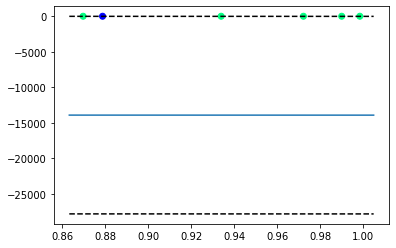

In [65]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - clf.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (clf.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (clf.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
